In [140]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [141]:
# This function is used to load the data and preproccess it.
def load_data():
    data_frame=pd.read_csv("D:\\ml\\final\\wdbc.csv",header=None)
    data_frame.drop(0,axis=1,inplace=True)
    data_frame[1].replace("B",0,inplace=True)
    data_frame[1].replace("M",1,inplace=True)
    return data_frame

In [142]:
#initializing the weight matrix and bias
def initialize(m):
#m is the no. of training examples    
    weights = np.zeros((m,1))
    bias = 0
    
    return weights , bias

In [143]:
#Sigmoid Fuction
def sigmoid_function(Z):
    return 1/(1 + np.exp(- Z))

In [144]:
#Calculating the Cost and gradients
def training(X, Y, weights, bias):
    
    m = X.shape[1] #Number of training examples

    #calculating the cost
    Z = np.dot(weights.T, X) + bias;    
    sigmoid = sigmoid_function(Z)
    cost= -(1/m) * np.sum( Y * np.log(sigmoid) + (1-Y) * np.log(1-sigmoid))
    
    #calculating the gradients to minimize the cost function 
    derived_weights = (1/m)* np.dot(X, (sigmoid - Y).T)
    derived_bias = (1/m)* np.sum(sigmoid - Y)
    
    
    gradients = {"dw" : derived_weights, "db" : derived_bias}
    
    return gradients, cost

In [145]:
#Optimizing the weights and calculating the cost for each epoch
def optimize(X, Y, weights, bias, epochs, learning_rate):
    
    
    costs=[]
    predictions=[]
    
    for i in range(epochs):
 
        gradients, cost = training(X, Y, weights, bias)
        
        derived_weights = gradients["dw"]
        derived_bias = gradients["db"]
        
        weights = weights - learning_rate * derived_weights
        bias = bias - learning_rate * derived_bias
        
        #Storing the cost at interval of every 10 iterations
        if i % 10 == 0:
            costs.append(cost)
            print("cost after %i iteration : %f" % (i, cost))
        
        prediction = predict(X, weights, bias)
        predictions.append(100 - np.mean(np.abs(prediction - Y.T)) * 100)
        
            
    w = {"w":weights, "b":bias}
    gradients = {"dw":derived_weights, "db":derived_bias}
    
    return w, gradients, costs, predictions

In [146]:
#Predicting the value of y by using decision boundary
def predict(X, weights, bias):
    
    m = X.shape[1] #Number of training examples
    
    y_prediction =  np.zeros((1,m))
    
    weights = weights.reshape(X.shape[0], 1)
    
    sigmoid=sigmoid_function(np.dot(weights.T, X)+bias)
    
    #print(sigmoid . round(0.5))
    
    for i in range(sigmoid.shape[1]):
        
        if(sigmoid[0,i]<0.5):
            y_prediction[0,i]=0
        else:
            y_prediction[0,i]=1           
    
    return y_prediction

In [147]:
# Initialising the logistic legression algorithm
def logistic_regression(X_train, Y_train, epochs, learning_rate):
    
    no_of_dimensions = X_train.shape[0] #Number of features
    
    weights,bias = initialize(no_of_dimensions)
    
    parameters, gradients, costs, predictions = optimize(X_train, Y_train, weights, bias, epochs, learning_rate) 
    
    weights = parameters["w"]
    bias = parameters["b"]
    
    d={"w":weights, "b":bias, "costs": costs, "predictions": predictions}
    
    return d

In [148]:
input_data=load_data()

train_test , test= train_test_split(input_data , test_size = 0.1 , random_state = 50)
train , validate= train_test_split(train_test , test_size = (1/9) , random_state = 50)

x_train = train.loc[:, 2:31]
y_train = train.loc[:, 1]
x_val   = validate.loc[:, 2:31]
y_val   = validate.loc[:, 1]
x_test  = test.loc[:, 2:31]
y_test  = test.loc[:, 1]

#Normalising the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val   = sc.transform(x_val)
x_test  = sc.transform(x_test)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_val = np.asarray(x_val)
y_val = np.asarray(y_val)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)




cost after 0 iteration : 0.693147
cost after 10 iteration : 0.541927
cost after 20 iteration : 0.455045
cost after 30 iteration : 0.398917
cost after 40 iteration : 0.359417
cost after 50 iteration : 0.329907
cost after 60 iteration : 0.306885
cost after 70 iteration : 0.288329
cost after 80 iteration : 0.272990
cost after 90 iteration : 0.260050
cost after 100 iteration : 0.248955
cost after 110 iteration : 0.239311
cost after 120 iteration : 0.230833
cost after 130 iteration : 0.223308
cost after 140 iteration : 0.216572
cost after 150 iteration : 0.210501
cost after 160 iteration : 0.204992
cost after 170 iteration : 0.199968
cost after 180 iteration : 0.195362
cost after 190 iteration : 0.191121
cost after 200 iteration : 0.187201
cost after 210 iteration : 0.183564
cost after 220 iteration : 0.180179
cost after 230 iteration : 0.177020
cost after 240 iteration : 0.174062
cost after 250 iteration : 0.171287
cost after 260 iteration : 0.168677
cost after 270 iteration : 0.166216
cos

Text(0,0.5,'loss')

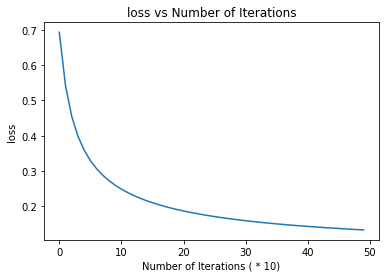

In [149]:
# Calling the logistic regression function
regression_model = logistic_regression(x_train.T, y_train.T, epochs=500,learning_rate = 0.01)

costs=regression_model["costs"]
weights=regression_model["w"]
bias=regression_model["b"]
predictions=regression_model["predictions"]

#Drawing the plot between cost and number of iterations
plt.plot(costs)
plt.title("loss vs Number of Iterations")
plt.xlabel("Number of Iterations ( * 10)")
plt.ylabel("loss")


Text(0,0.5,'accuracy')

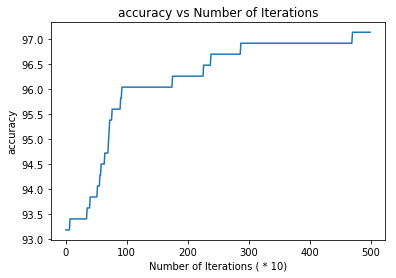

In [150]:
#Drawing the plot between cost and number of iterations
plt.plot(predictions)
plt.title("accuracy vs Number of Iterations")
##Drawing the plot between cost and number of iterations
plt.title("accuracy vs Number of Iterations")
plt.xlabel("Number of Iterations ( * 10)")
plt.ylabel("accuracy")

In [151]:
prediction_train = predict(x_train.T, weights, bias)
prediction_test = predict(x_test.T, weights, bias)
prediction_val = predict(x_val.T, weights,bias)

#print("\n Train accuracy: {} %".format(100 - np.mean(np.abs(prediction_train - y_train.T)) * 100))
#print("\n Validation Data accuracy: {} %".format(100 - np.mean(np.abs(prediction_val - y_val.T)) * 100)) 
#print("\n Test accuracy: {} %".format(100 - np.mean(np.abs(prediction_test - y_test.T)) * 100))

prediction_test=prediction_test.reshape(x_test.shape[0], 1)

#Calculating the metrics using the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix( y_test, prediction_test)
print(cm)
TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]
acc = (TP+TN)/(TP+TN+FP+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)
F_Measure = (2*recall*precision)/(recall+precision)
print("accuracy:",acc*100,"%")
print("recall:",recall*100,"%")
print("precision:",precision*100,"%")
print("F_Measure:",F_Measure*100,"%")

[[41  1]
 [ 0 15]]
accuracy: 98.24561403508771 %
recall: 97.61904761904762 %
precision: 100.0 %
F_Measure: 98.79518072289156 %
